<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Roads_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [158]:
!pip install contextily

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [159]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)

In [161]:
ccd = ccd.to_crs("EPSG:2235")
rail = rail.to_crs("EPSG:2235");

In [109]:
#ccd = ccd.to_crs(rail.crs)

# Get the intersection of the line and the polygon
intersection = gpd.overlay(rail, ccd[ccd["NAME"]=="Newark"], how="intersection")


# Get the length of the intersection
intersection.length.sum()

# Print the result
#print(f"The length of the line within the polygon is {length:.2f} units.")

222102.7616889914

                                             SHAPELEN      length_ft  \
OWNER                                                                  
CSX Transportation                       21867.001418   27646.472174   
National Railroad Passenger Corporation  87951.279737  180676.018100   
Norfolk Southern Corporation              5772.464635   13780.271416   

                                         length_miles  
OWNER                                                  
CSX Transportation                           5.236076  
National Railroad Passenger Corporation     34.218954  
Norfolk Southern Corporation                 2.609901  


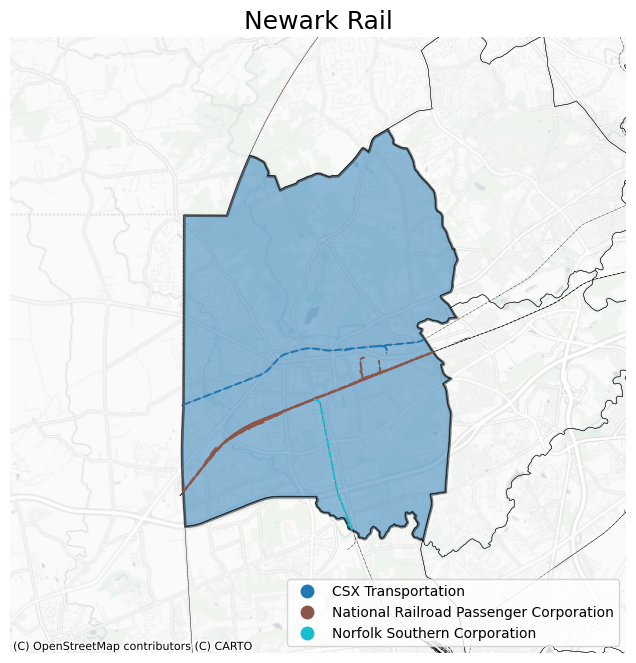

In [162]:
import contextily as cx

CCD = "Newark"
resol = 30000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

fig, ax = plt.subplots(figsize=(8,8))

plt.title(CCD + " Rail", fontdict={"fontsize":18})

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
rail.plot(color="k", linestyle="-.", lw = 0.3, ax=ax)

intersect = gpd.overlay(rail, ccd[ccd["NAME"]==CCD], how="intersection")
intersect.plot("OWNER", linestyle="--", ax=ax,
                        legend=True,
                        legend_kwds={'loc':"lower right"})

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394

print(intersect.groupby("OWNER").sum(numeric_only = True)[["SHAPELEN","length_ft", "length_miles"]])

In [139]:
gpd.overlay(rail, ccd[ccd["NAME"]==CCD], how="intersection").groupby("OWNER").sum()

<ipython-input-139-d7d17ed979ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gpd.overlay(rail, ccd[ccd["NAME"]==CCD], how="intersection").groupby("OWNER").sum()


,OBJECTID,RAIL_ID,SHAPELEN,ALAND,AWATER
OWNER,,,,,
CSX Transportation,2925,3891,21867.001418,545488839,107562
National Railroad Passenger Corporation,92962,105416,87951.279737,8182332585,1613430
Norfolk Southern Corporation,2877,6427,5772.464635,233780931,46098


In [163]:
gpd.overlay(rail, ccd[ccd["NAME"]==CCD], how="intersection").crs

<Projected CRS: EPSG:2235>
Name: NAD83 / Delaware (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Delaware - counties of Kent; New Castle; Sussex.
- bounds: (-75.8, 38.44, -74.97, 39.85)
Coordinate Operation:
- name: SPCS83 Delaware zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [169]:
print(ccd.crs)
print(intersect.crs)
print(CFC.crs)
print(rail.crs)

EPSG:2235
EPSG:2235
EPSG:2235
EPSG:2235


In [ ]:
ccd.to_crs("EPSG:2235")

In [167]:
ccd.crs

<Projected CRS: EPSG:2235>
Name: NAD83 / Delaware (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Delaware - counties of Kent; New Castle; Sussex.
- bounds: (-75.8, 38.44, -74.97, 39.85)
Coordinate Operation:
- name: SPCS83 Delaware zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [11]:
#road_invent = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Road_Inventory_2.0 (2)/Delaware_Road_Inventory_2.0.shp")

In [170]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [154]:
CFC.head()

,OBJECTID_1,COUNTY,FREIGHT_NE,ROUTE_NAME,START_POIN,END_POINT,LENGTH,CRFC_ID,ID_NUM,SEGMENT,...,TRUCK_PERC,TRUCK_PEAK,AXLE_CORRE,TRUCK_WEIG,TRAFFIC_GR,ROADWAY_ID,LAST_COUNT,TRPKHR,OLD_AXLE,geometry
0,1,New Castle,CUFC,SR 1 (Segment B),Former Gov. Lea Rd. Crossover,Lorewood Grove Rd. (Exit 148),4.12,"H, K",6,None,...,15,0,2,0,5,10437,62096.384,14,None,"LINESTRING (-8421569.775 4800132.760, -8421755..."
1,2,Kent,CUFC,SR 1 (Segment C),Paddock Rd. Overpass,S. Smyrna Exit (Ex. 114),2.82,"H, K",7,None,...,43,0,138,0,21,9516,121636.084,44,None,"LINESTRING (-8414807.202 4762697.324, -8414812..."
2,3,Kent,CUFC,SR 1 (Segment D),Twin Willows Rd. Overpass,Leipsic River Crossing,0.82,"H, K",8,None,...,14,0,46,0,8,9516,39392.080,15,None,"LINESTRING (-8413707.446 4756404.968, -8413708..."
3,4,Kent,CUFC,SR 1 (Segment E),Emergency Access Ramp,Dyke Branch Rd.,1.62,"H, K",9,None,...,14,0,46,0,8,9516,39392.080,15,None,"LINESTRING (-8409867.491 4751831.731, -8409883..."
4,5,Kent,CUFC,SR 1 (Segment F),Exit 104 Ramps,0.35 mi. S. of Leipsic Rd. Overpass,1.70,"H, K",10,None,...,28,0,92,0,16,9516,60371.960,30,None,"MULTILINESTRING ((-8407739.200 4749505.583, -8..."


            LENGTH     length_ft  length_miles
FREIGHT_NE                                    
PFN            0.0  13574.397697      2.570909


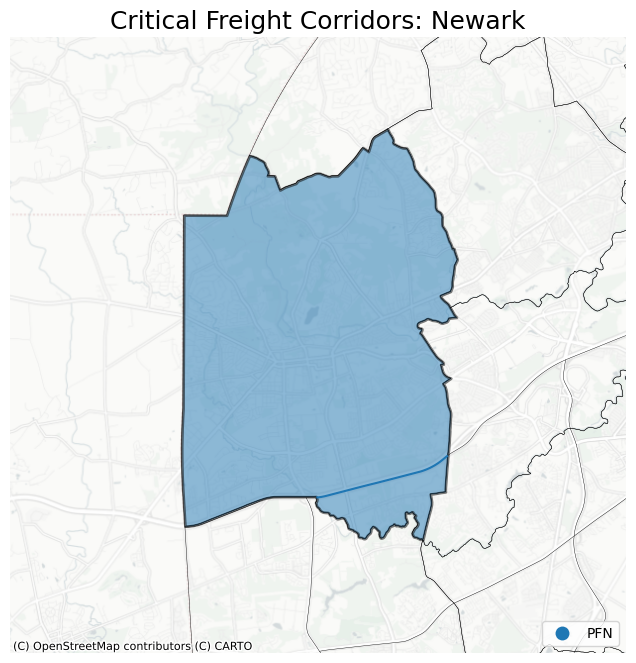

In [172]:
import contextily as cx

CCD = "Newark"
resol = 30000
x_low = ccd[ccd["NAME"]==CCD].centroid.x.values[0] - resol
x_high = ccd[ccd["NAME"]==CCD].centroid.x.values[0] + resol
y_low = ccd[ccd["NAME"]==CCD].centroid.y.values[0] - resol
y_high = ccd[ccd["NAME"]==CCD].centroid.y.values[0] + resol

fig, ax = plt.subplots(figsize=(8,8))

plt.title("Critical Freight Corridors: " + CCD, fontdict={"fontsize":18})

ccd.plot(facecolor = "none", lw = 0.3, ax=ax)
ccd[ccd["NAME"]==CCD].plot(alpha=0.5, edgecolor="k", lw = 2 , ax=ax)
CFC.plot(color="k", linestyle="-", lw = 0.3, ax=ax)

intersect = gpd.overlay(CFC, ccd[ccd["NAME"]==CCD],
            how="intersection")

intersect.plot("FREIGHT_NE", linestyle="-", ax=ax,
                             legend=True,
                             legend_kwds={'loc':"lower right"})

ax.set_xlim(x_low, x_high)
ax.set_ylim(y_low, y_high)
ax.set_axis_off()

cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, crs = "EPSG:2235")
fig.show()

intersect["length_ft"] = intersect.length
intersect["length_miles"] = intersect.length_ft * 0.000189394
print(intersect.groupby("FREIGHT_NE").sum(numeric_only = True)[["LENGTH", "length_ft", "length_miles"]])